#### **Author: Taiwo Owoseni**
#### **Date: 10th January , 2022**
#### **Shopify Data Science Intern Role Challenge**
----------

#### Problem Statement 
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. \
- b. What metric would you report for this dataset?
- c. What is its value?
------

In [1]:
import altair as alt
import pandas as pd

alt.renderers.enable('png')
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

# ignore chaining error
pd.options.mode.chained_assignment = None

---
##### **Read Data**
This that is from the shopify challenge: Here is the URL to reproduce the code: [Link]( "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0")

In [2]:
# URL to reproduce the code
# URL = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"

# FILE_PATH = "shofify_challenge/data/"

df = pd.read_csv("data/data.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


------------
##### Data Information
- I will start with Data Information to check for missing values and data types of every feature

In [3]:
print("Data Information")
print("-------------------------")
df.info()

Data Information
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


- Since there are no missing values. I will convert the `order_id`, `shop_id`, `user_id` to categorical columns and create a new column: `unit_price`.
##### Munging and Wrangling 

In [4]:
df[["order_id", "shop_id", "user_id"]] = df[["order_id", "shop_id", "user_id"]].astype(str)
df["unit_price"] = df["order_amount"] / df["total_items"]

print("After adding the new feature. This is what the dataframe looks like: ")
print("-------------------------")
df.head()

After adding the new feature. This is what the dataframe looks like: 
-------------------------


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


I will move to the questions now

-----
#### Question a : - A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 



- I will start by computing the **AOV** for the dataset to see if we arrive at the same value

$$ Average\ Order\ Value\ (AOV)   = \frac {Total\ Revenue}{Total\ Order}$$

In [5]:
total_revenue = df.order_amount.sum()
total_order = df.order_id.count()

aov = total_revenue/ total_order
print(f'AOV is : ${aov}')

AOV is : $3145.128


- I got the same AOV that was stated in the Problem Statement. I will go ahead to explore the dataset

##### EXPLORE DATASET
---

In [6]:
print("Descriptive statisitcs of Data")
print("-------------------------")
df.describe(include = "all")

Descriptive statisitcs of Data
-------------------------


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
count,5000,5000,5000,5000.000000,5000.00000,5000,5000,5000.000000
unique,5000,100,301,NaN,NaN,3,4991,NaN
top,1,53,718,NaN,NaN,credit_card,2017-03-28 4:00:00,NaN
freq,1,68,28,NaN,NaN,1735,3,NaN
mean,NaN,NaN,NaN,3145.128000,8.78720,NaN,NaN,387.742800
std,NaN,NaN,NaN,41282.539349,116.32032,NaN,NaN,2441.963725
min,NaN,NaN,NaN,90.000000,1.00000,NaN,NaN,90.000000
25%,NaN,NaN,NaN,163.000000,1.00000,NaN,NaN,133.000000
50%,NaN,NaN,NaN,284.000000,2.00000,NaN,NaN,153.000000
75%,NaN,NaN,NaN,390.000000,3.00000,NaN,NaN,169.000000


I observed that the 
- Standard Deviation of the `order_amount: 41,282.53` is larger than the mean of the  `order_amount: 3145.13`.
- The maximum order is very large : `704,000`.

 I will probe further by plotting the distribution of the `total_order_amount` for the 100 shops.

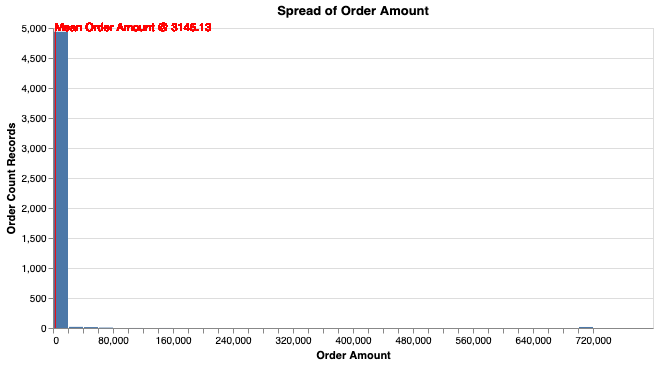

In [7]:
hist_order_amount = alt.Chart(df).mark_bar().encode(
    x=alt.X('order_amount', bin=alt.Bin(maxbins=50), title = "Order Amount"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Order Amount "
)
annot = df.copy()
annot['text'] = 'Mean Order Amount @ 3145.13'

rule = alt.Chart(df).mark_rule(color='red').encode(
    x ='mean(order_amount):Q'
)

text_annote_true = alt.Chart(annot).mark_text(color = 'red', dy=-150, dx=-220).encode(
    text= 'text')

hist_order_amount + rule + text_annote_true

- I obeserve that the distribution is right skewed with a largest percentage of the population far from the `mean order_amount`. 

The following are probable reasons for the skewedness of the order amount population.
- Wrongly input data.
- Shops with higher order amount are pricey.
- Shops with higher order amount pay more to get traffic to their store.

I will attempt to calculate the `AOV` for indivdual shops. I will demonstrate this below:


In [8]:
# AOV for each store.
shop_aov = df.groupby('shop_id')["order_amount"].mean().reset_index()
shop_aov = shop_aov.rename(columns = {"order_amount":"shop_aov"})

# join the shop_aov table to the original df
merged_df = df.merge(shop_aov)

##### Distribution of `SHop AOV`
-----

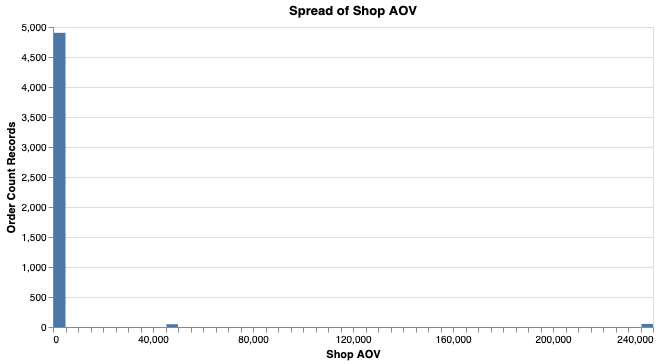

In [9]:
hist_shop_aov = alt.Chart(merged_df).mark_bar().encode(
    x=alt.X('shop_aov', bin=alt.Bin(maxbins=50), title = "Shop AOV"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Shop AOV"
)
hist_shop_aov

The `Spread of Shop AOV` plot is very similiar to that of the `Spread of Order Amount`. I will conclude by saying, visually it appears that there are three groupings by eye balling: 
- Shops that have a AOV between 0 - 10,000
- Shops that have AOV between 40,000 and 60,000
- Shops that have AOV between 200,000 and 240,000


I will visualize the `shop aov` distribution for the three categories and with three numerical values in consideration:

- SHop AOV
- Order Amount
- Unit Price
#### SHOP WITH AOV BETWEEN 0 and 10,000

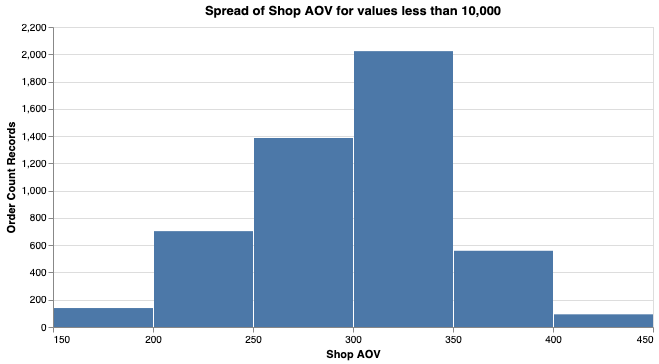

In [10]:
less_than_10_000 = merged_df.query("shop_aov < 10000 ")
hist_shop_aov_10_000 = alt.Chart(less_than_10_000).mark_bar().encode(
    x=alt.X('shop_aov', bin=alt.Bin(maxbins=5), title = "Shop AOV"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Shop AOV for values less than 10,000"
)
hist_shop_aov_10_000 

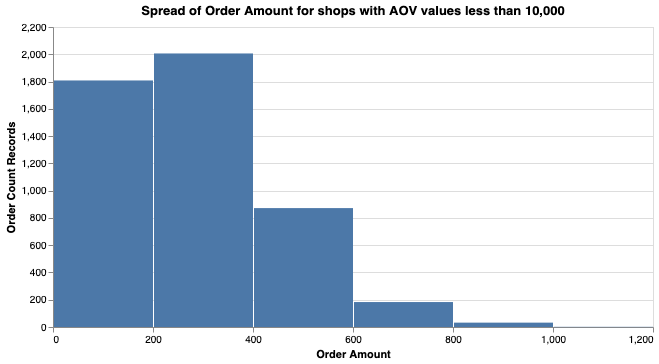

In [11]:
hist_order_amt_10_000 = alt.Chart(less_than_10_000).mark_bar().encode(
    x=alt.X('order_amount', bin=alt.Bin(maxbins=5), title = "Order Amount"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Order Amount for shops with AOV values less than 10,000"
)
hist_order_amt_10_000

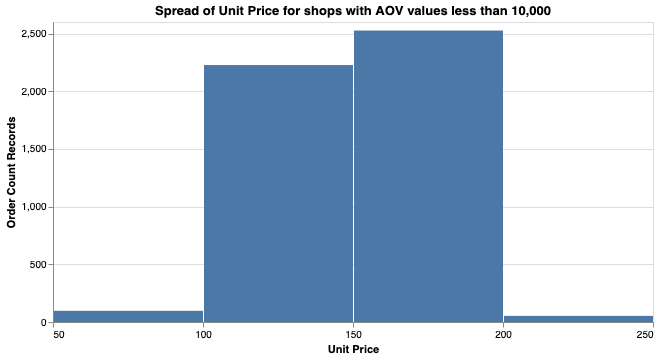

In [12]:
hist_unit_price_10_000 = alt.Chart(less_than_10_000).mark_bar().encode(
    x=alt.X('unit_price', bin=alt.Bin(maxbins=5), title = "Unit Price"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Unit Price for shops with AOV values less than 10,000"
)
hist_unit_price_10_000

The distrubtion for the `Unit Price` and `Shop AOV` in the first category (less than 10,000) looks like an approximation of a normal distribution. This means that they sell very related prices. The `Order Amount` is right skewed and it is influenced by the total number of items purchased by the users.
 This is somewhat what is expect form a sample of the population. 

#### SHOP WITH AOV BETWEEN 40,000 and 60,000

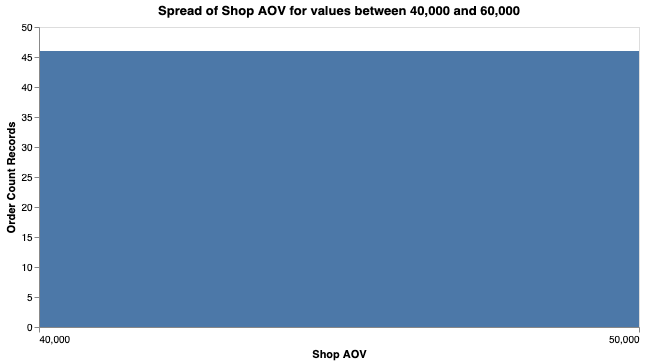

In [13]:
less_than_60_000 = merged_df.query("shop_aov > 40_000 and shop_aov < 60_000 ")
hist_shop_aov_60_000 = alt.Chart(less_than_60_000).mark_bar().encode(
    x=alt.X('shop_aov', bin=alt.Bin(maxbins= 5), title = "Shop AOV"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Shop AOV for values between 40,000 and 60,000"
)
hist_shop_aov_60_000

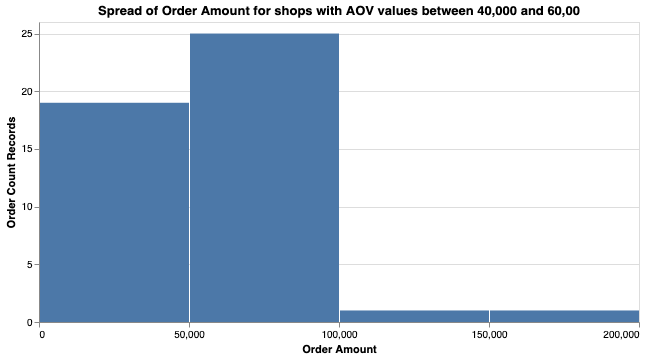

In [14]:
less_than_60_000 = merged_df.query("shop_aov > 40_000 and shop_aov < 60_000 ")
hist_order_amt_60_000 = alt.Chart(less_than_60_000).mark_bar().encode(
    x=alt.X('order_amount', bin=alt.Bin(maxbins=5), title = "Order Amount"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Order Amount for shops with AOV values between 40,000 and 60,00"
)
hist_order_amt_60_000

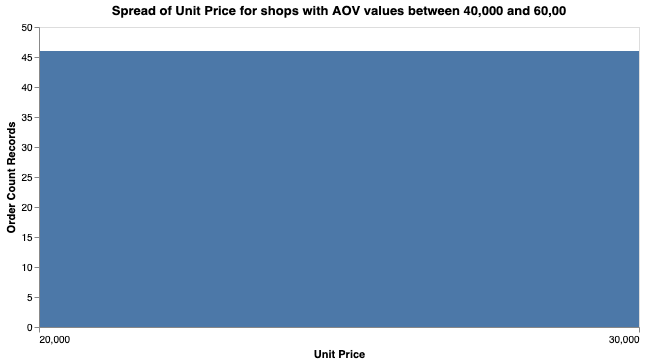

In [15]:
hist_unit_price_60_000 = alt.Chart(less_than_60_000).mark_bar().encode(
    x=alt.X('unit_price', bin=alt.Bin(maxbins=5), title = "Unit Price"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Unit Price for shops with AOV values between 40,000 and 60,00"
)
hist_unit_price_60_000

The distrubtion for the second category for the `Unit Price` and `Shop AOV`(less than 60,000) looks like a uniform distribution. This is not what is expect frorm a sample of the population of Order history. This shows an outlier in the overall population. The `Order Amount` however is right skewed and it is influenced by the total number of items purchased by the users.
#### SHOP WITH AOV MORE THAN 200,000

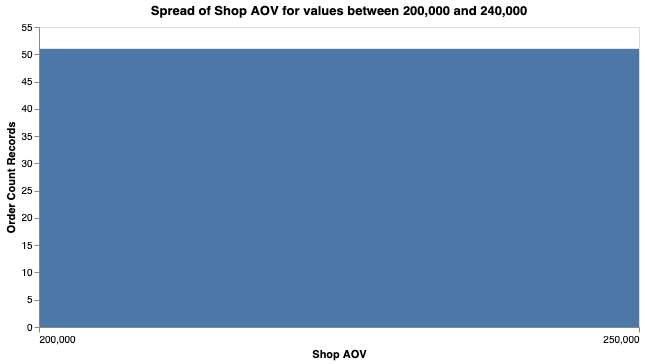

In [16]:
less_than_200_000 = merged_df.query("shop_aov > 200_000 and shop_aov < 240_000 ")
hist_shop_aov_200_000 = alt.Chart(less_than_200_000).mark_bar().encode(
    x=alt.X('shop_aov', bin=alt.Bin(maxbins= 5), title = "Shop AOV"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Shop AOV for values between 200,000 and 240,000"
)
hist_shop_aov_200_000

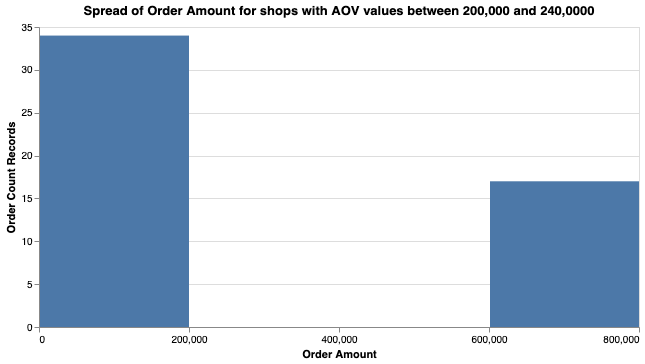

In [17]:
gt_than_200_000 = merged_df.query("shop_aov > 200_000")
hist_order_amt_200_000 = alt.Chart(gt_than_200_000).mark_bar().encode(
    x=alt.X('order_amount', bin=alt.Bin(maxbins=5), title = "Order Amount"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Order Amount for shops with AOV values between 200,000 and 240,0000"
)
hist_order_amt_200_000

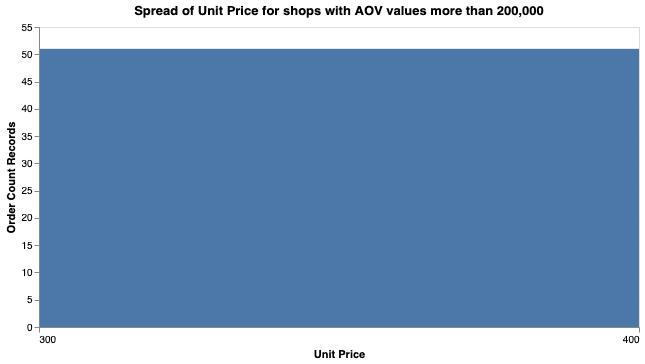

In [18]:
hist_unit_price_200_000 = alt.Chart(gt_than_200_000).mark_bar().encode(
    x=alt.X('unit_price', bin=alt.Bin(maxbins=5), title = "Unit Price"),
    y=alt.Y('count()' , title = 'Order Count Records')).properties(
    width=600,
    title = "Spread of Unit Price for shops with AOV values more than 200,000"
)
hist_unit_price_200_000

In the distrubtion for the third category the `Unit Price` and `Shop AOV`(more than 200,000) looks like a uniform distribution. This is not what is expect frorm a sample of the population of Order history. This shows an outlier in the overall population. The `Order Amount` however is right skewed and it is influenced by the total number of items purchased by the users.
#### SHOP WITH AOV MORE THAN 200,000

#### Think about a better way to evaluate this data. 

On that note, a better way to evaluate this dataset would be to remove the outliers and consider for the analysis only the shops that appear to have normally distributed `AOV`. 

A standard way to detect outliers will be to use the inter quartile range as a yardstick. I will remove from the observation shops whose unit price is such that:  $$  Unit Price < Q1 - 1.5 * IQR(Unit Price)$$  OR   $$  Unit Price > Q1 + 1.5 * IQR(Unit Price)$$ 

In [19]:
def remove_outlier(df, col):
    """
    Remove outlier form data frame
    using Inter Quartile range

    Paramters
    ---------
    df: DataFrame (pd.DataFrame)
    col: numeric column (int)

    Return
    ------
    DataFrame (pd.DataFrame)

    Example
    -------
    >>> remove(merged_df, 'unit_price')
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    low_value  = Q1 - 1.5 * IQR
    high_value  = Q3 + 1.5 * IQR
    
    new_df = df.loc[(df[col] > low_value) & (df[col] < high_value)]
    return new_df

The credit for the function above `remove_outlier` : [Stackoverflow](https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)

In [20]:
print(f"Shops Considering for the Analysis Are \
    {remove_outlier(merged_df, 'unit_price').shop_id.nunique()}")

Shops Considering for the Analysis Are     98


Hence , out of the 100 shops I will be considering 98 shops for the analysis

##### Question b: What metric would you report for this dataset?
----
I will be using the `AOV` as the metric this is because of the limited information from the data. I would like to mention other metrics I might have considered out the `AOV`. 

I will like to consider `LTV- Life Time Value` and `CAC-Customer Aquisition Cost`.  But I will rule them out because the data does not tell us about the Aquisition cost for each shop for that month and does not tell us about the margin. The reason for considering Customer's LTV and CAC is because I believe the data gives sufficient information about this metric.


#### mean AOV for the Categories with less than 10,000 Shop AOV


In [21]:
print(f"The mean AOV for the shop's with AOV is : ${less_than_10_000.shop_aov.mean()}")

The mean AOV for the shop's with AOV is : $300.1558229655313


##### Question c:  What is its value?

The AOV has a value of approximately is `$300.16`